# PROJEKT MOW 2

In [1]:
import os
from glob import glob
import zipfile
import librosa
import librosa.display
import librosa.display
import numpy as np
from matplotlib import pyplot as plt

import utils_lib

In [2]:
tracks = utils_lib.load('data/tracks.csv')
features = utils_lib.load('data/features.csv')
np.testing.assert_array_equal(features.index, tracks.index)

tracks.shape

(106574, 52)

In [3]:
small = tracks[tracks['set', 'subset'] <= 'small']
print(small.shape)
small.head(10)

(8000, 52)


album                                                           \
         comments        date_created date_released engineer favorites  id   
track_id                                                                     
2               0 2008-11-26 01:44:45    2009-01-05      NaN         4   1   
5               0 2008-11-26 01:44:45    2009-01-05      NaN         4   1   
10              0 2008-11-26 01:45:08    2008-02-06      NaN         4   6   
140             1 2008-11-26 01:49:59    2007-05-22      NaN         1  61   
141             0 2008-11-26 01:49:57    2009-01-16      NaN         1  60   
148             0 2008-11-26 01:50:19    2009-01-15      NaN         0  66   
182             0 2008-11-26 01:52:18    2005-04-26      NaN         0  80   
190             0 2008-11-26 01:52:31    2009-01-07      NaN         0  84   
193             0 2008-11-26 01:52:31    2009-01-07      NaN         0  84   
194             0 2008-11-26 01:52:31    2009-01-07      NaN         0  84   

                                                                     \
                                                information listens   
track_id                                                              
2                                                   <p></p>    6073   
5                                                   <p></p>    6073   
10                                                      NaN   47632   
140       <p>Alec K. Redfearn &amp; The Eyesores: Ellen ...    1300   
141       <p>A full ensamble of strings, drums, electron...    1304   
148       <p>"Compositions for electronics and voice." I...    1831   
182       <p><em>Worn Copy</em> is    the history of pop...    5289   
190       <p><em>Blue Piano</em> is an unreleased collec...   12333   
193       <p><em>Blue Piano</em> is an unreleased collec...   12333   
194       <p><em>Blue Piano</em> is an unreleased collec...   12333   

                                               ...       track           \
                                producer tags  ... information interest   
track_id                                       ...                        
2                                    NaN   []  ...         NaN     4656   
5                                    NaN   []  ...         NaN     1933   
10                                   NaN   []  ...         NaN    54881   
140       Alec K. Refearn, Rob Pemberton   []  ...         NaN     1593   
141                                  NaN   []  ...         NaN      839   
148                                  NaN   []  ...         NaN     2437   
182                                  NaN   []  ...         NaN     5990   
190                                  NaN   []  ...         NaN     1758   
193                                  NaN   []  ...         NaN     1679   
194                                  NaN   []  ...         NaN     1780   

                                                                           \
         language_code                                            license   
track_id                                                                    
2                   en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   
5                   en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   
10                  en  Attribution-NonCommercial-NoDerivatives (aka M...   
140                 en  Attribution-Noncommercial-No Derivative Works ...   
141                 en  Attribution-Noncommercial-No Derivative Works ...   
148                 en  Attribution-Noncommercial-Share Alike 3.0 Unit...   
182                 en  Attribution-Noncommercial-No Derivative Works ...   
190                 en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   
193                 en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   
194                 en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   

                                                                        
         listens lyric

In [55]:
#group tracks by genre
genres_tracks = small['track', 'genre_top']
genres = genres_tracks.groupby(genres_tracks).groups
samples = {k: f"{v[0]:06d}.mp3" for k, v in genres.items() if len(v) > 0}

In [57]:
plt.rcParams['figure.figsize'] = (17, 5)

def read_data(samples):
    filenames = [y for x in os.walk('data_mp3') for y in glob(os.path.join(x[0], '*.mp3'))]
    filenames = [f for f in filenames if f.split("\\")[-1] in samples.values()]
    filenames_map = {f.split("\\")[-1]: f for f in filenames}
    samples_map = {k: filenames_map[f] for k, f in samples.items()}

    print(samples_map)
    data = {}
    sampling_rate = {}
    for k, v in samples_map.items():
        print("Reading file: " + v)
        if v.endswith('.mp3'):
            data_n, sampling_rate_n = librosa.load(v, duration=10)
            data[k] = data_n
            sampling_rate[k] = sampling_rate_n
    return data, sampling_rate


data, sampling_rate = read_data(samples)

{'Electronic': 'data_mp3\\fma_small\\001\\001482.mp3', 'Experimental': 'data_mp3\\fma_small\\000\\000148.mp3', 'Folk': 'data_mp3\\fma_small\\000\\000140.mp3', 'Hip-Hop': 'data_mp3\\fma_small\\000\\000002.mp3', 'Instrumental': 'data_mp3\\fma_small\\010\\010250.mp3', 'International': 'data_mp3\\fma_small\\000\\000666.mp3', 'Pop': 'data_mp3\\fma_small\\000\\000010.mp3', 'Rock': 'data_mp3\\fma_small\\000\\000182.mp3'}
Reading file: data_mp3\fma_small\001\001482.mp3
Reading file: data_mp3\fma_small\000\000148.mp3
Reading file: data_mp3\fma_small\000\000140.mp3
Reading file: data_mp3\fma_small\000\000002.mp3
Reading file: data_mp3\fma_small\010\010250.mp3
Reading file: data_mp3\fma_small\000\000666.mp3
Reading file: data_mp3\fma_small\000\000010.mp3
Reading file: data_mp3\fma_small\000\000182.mp3


# WIZUALIZACJA DANYCH

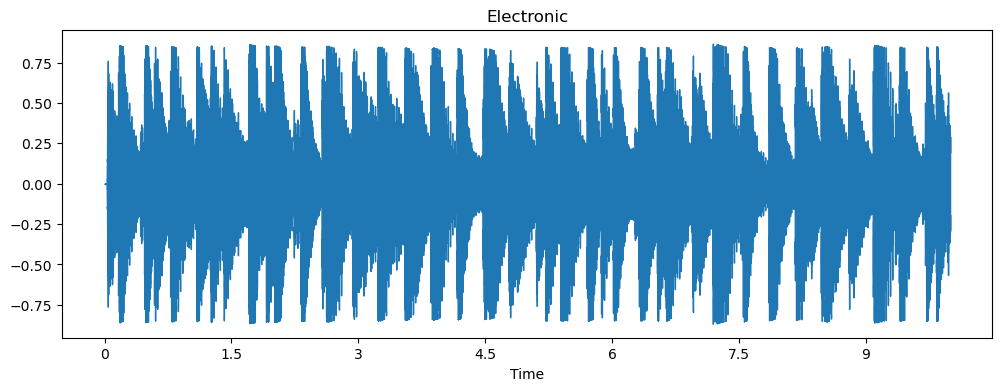

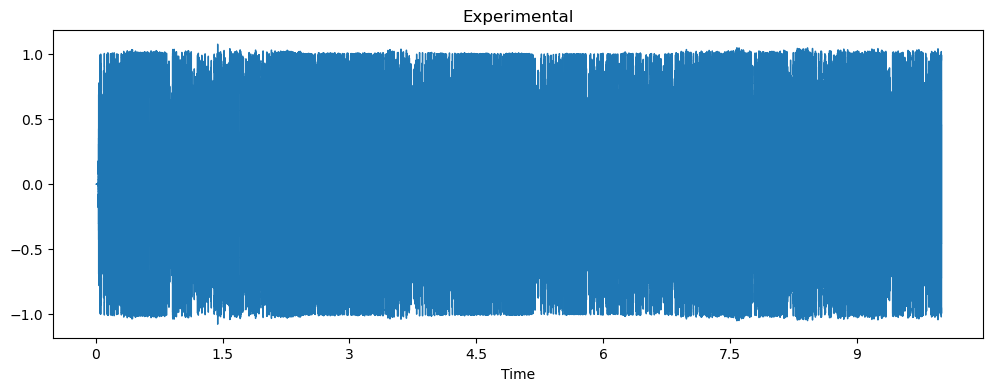

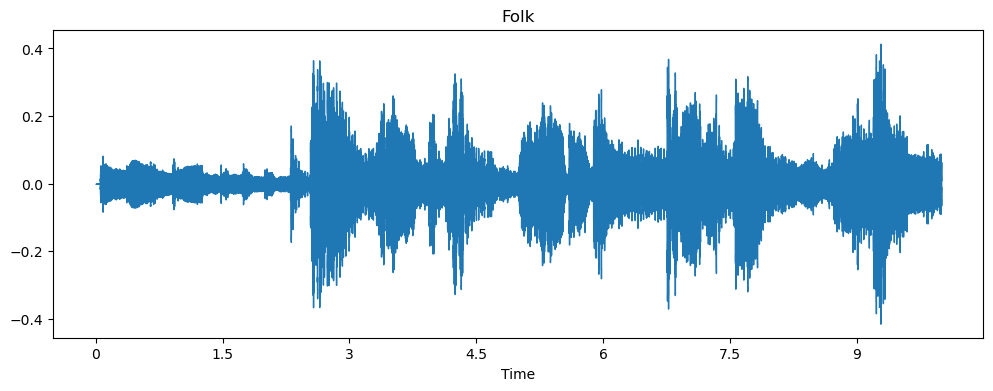

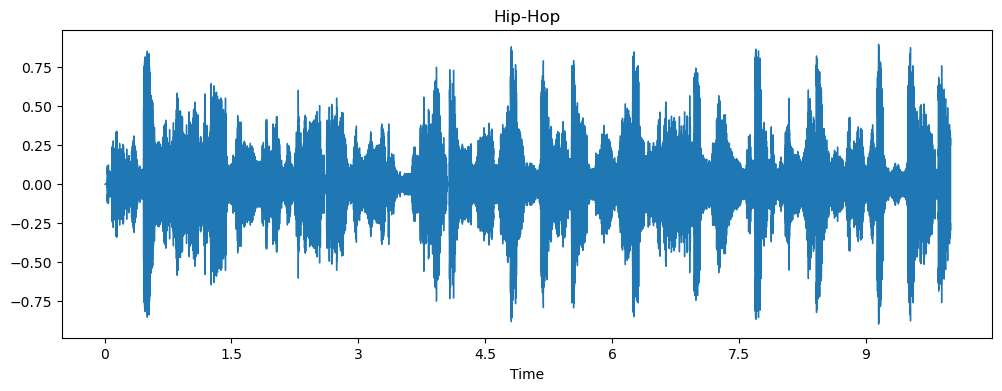

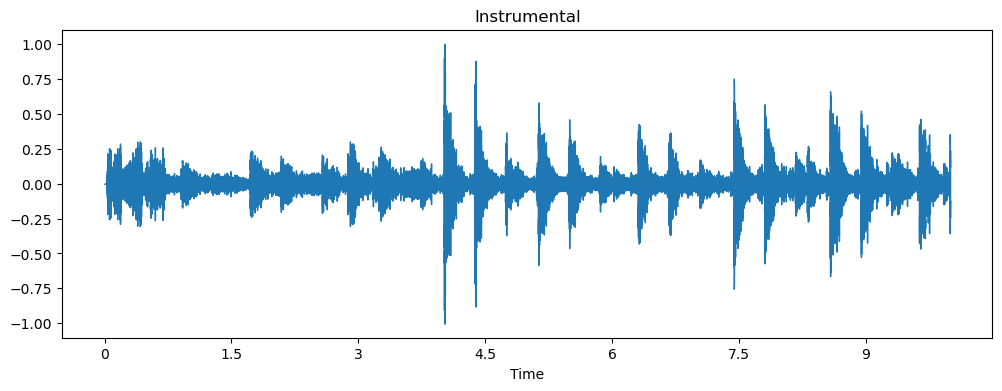

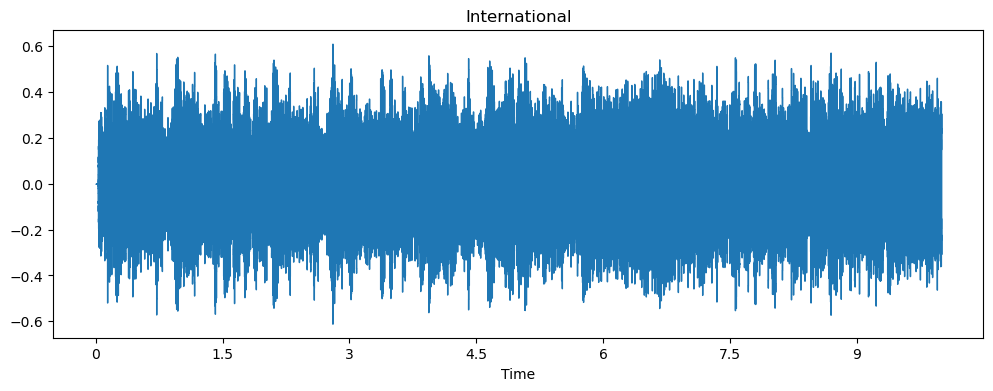

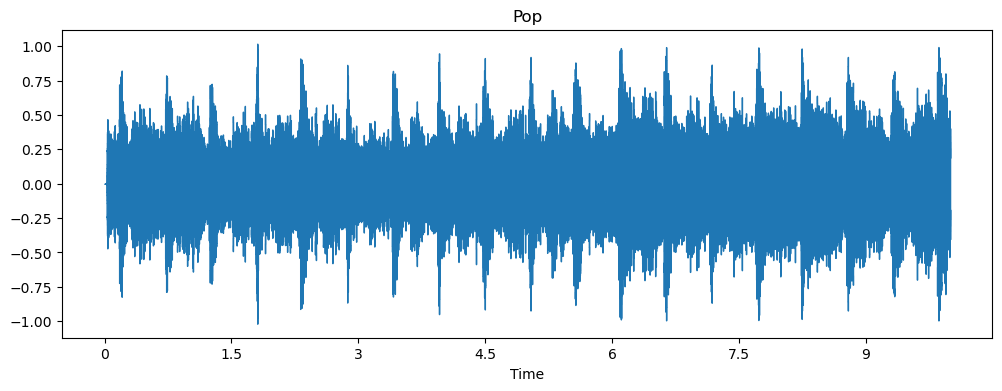

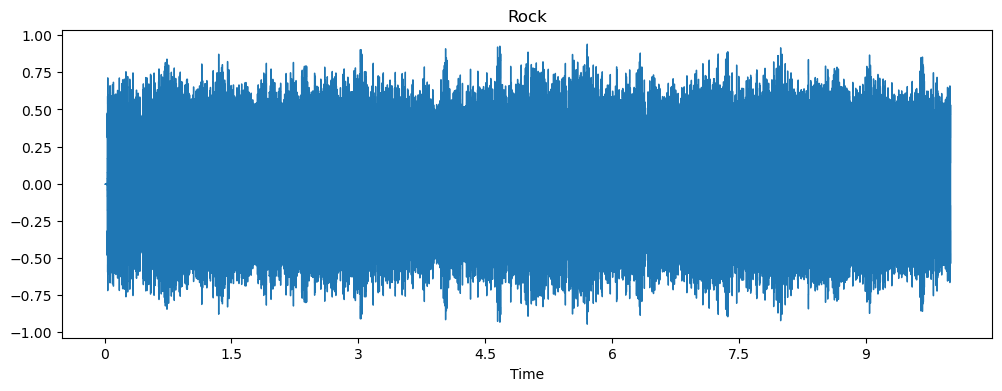

In [59]:
# plot the signal for each genre
def plot_genres(genres, data, sampling_rate):
    for k, v in genres.items():
        plt.figure(figsize=(12, 4))
        librosa.display.waveshow(np.array(data[k]), sr=sampling_rate[k])
        plt.title(k)
        plt.show()

plot_genres(samples, data, sampling_rate)

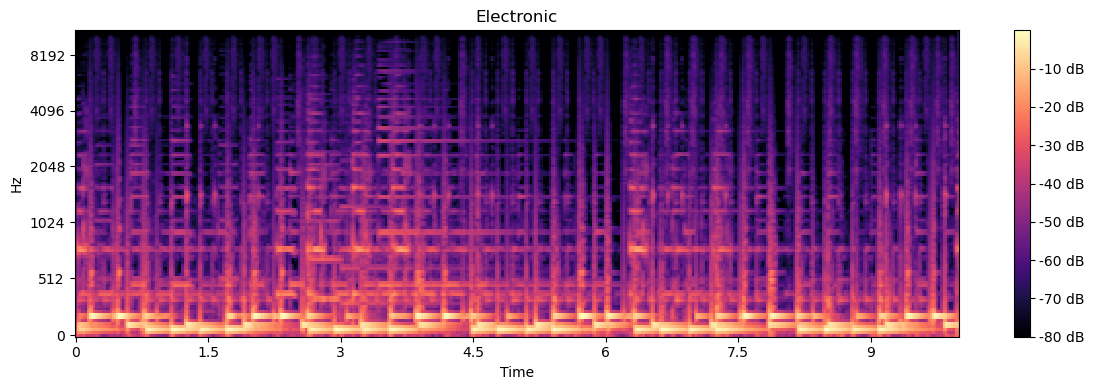

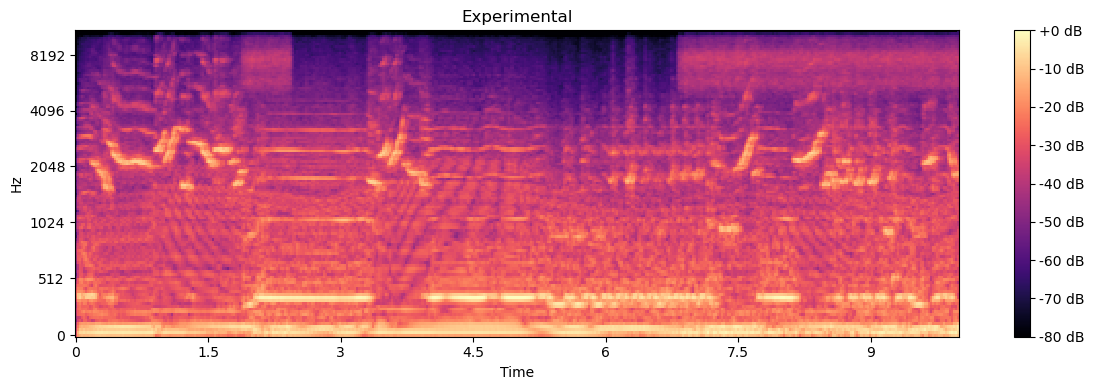

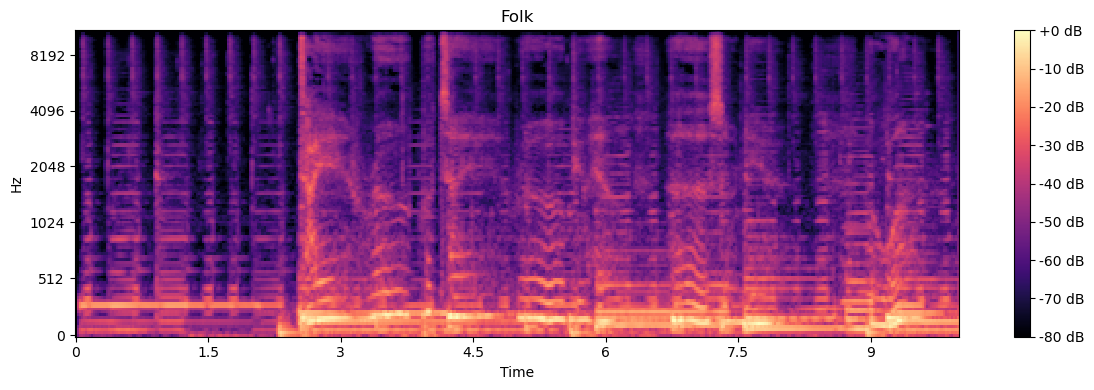

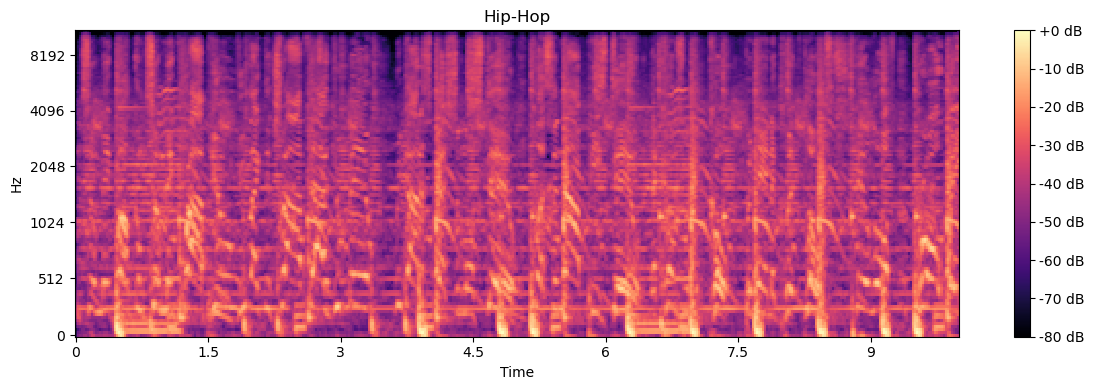

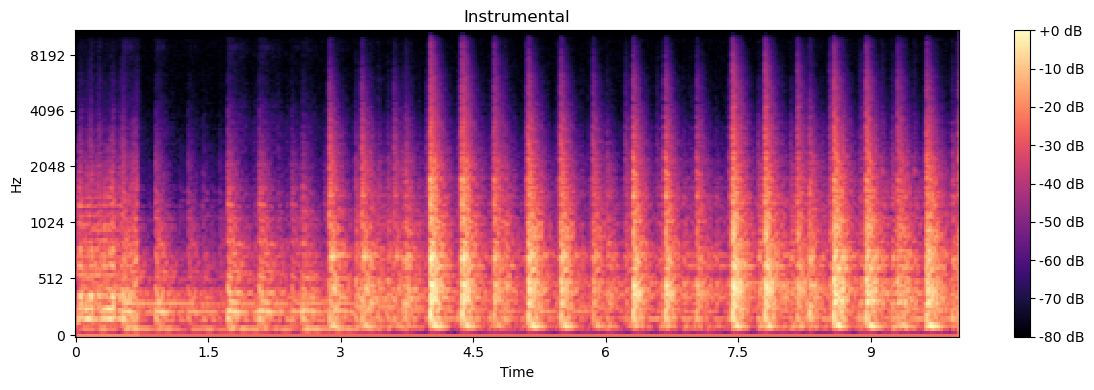

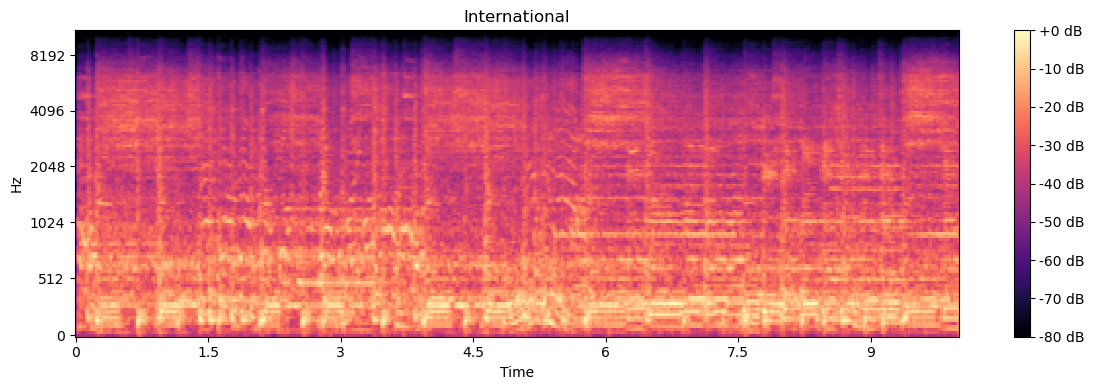

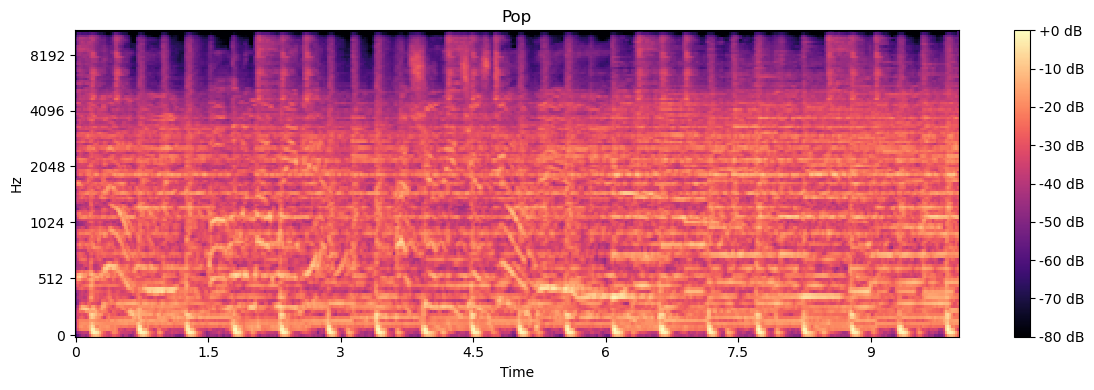

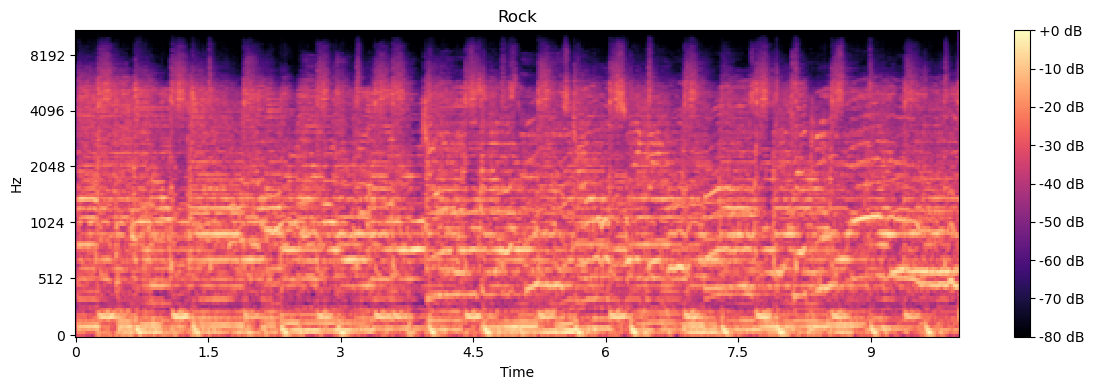

In [60]:
# plot the spectrogram for each genre
def get_spectrogram(y, sr):
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    log_S = librosa.power_to_db(S, ref=np.max)
    return log_S

def plot_spectrogram(genres, data, sampling_rate):
    for k, v in genres.items():
        plt.figure(figsize=(12, 4))
        log_S = get_spectrogram(data[k], sampling_rate[k])
        librosa.display.specshow(log_S, sr=sampling_rate[k], x_axis='time', y_axis='mel')
        plt.title(k)
        plt.colorbar(format='%+02.0f dB')
        plt.tight_layout()
        plt.show()

plot_spectrogram(samples, data, sampling_rate)

Zarówno na wykresach sygnałów jak na wykresach prezentujących spektrogram widać duże różnice między poszczególnymi klasami - na tyle, że można bez problemu zauważyć je gołym okiem.

### HISTOGRAM ROZKŁADU KLAS

Text(0, 0.5, 'Number of tracks')

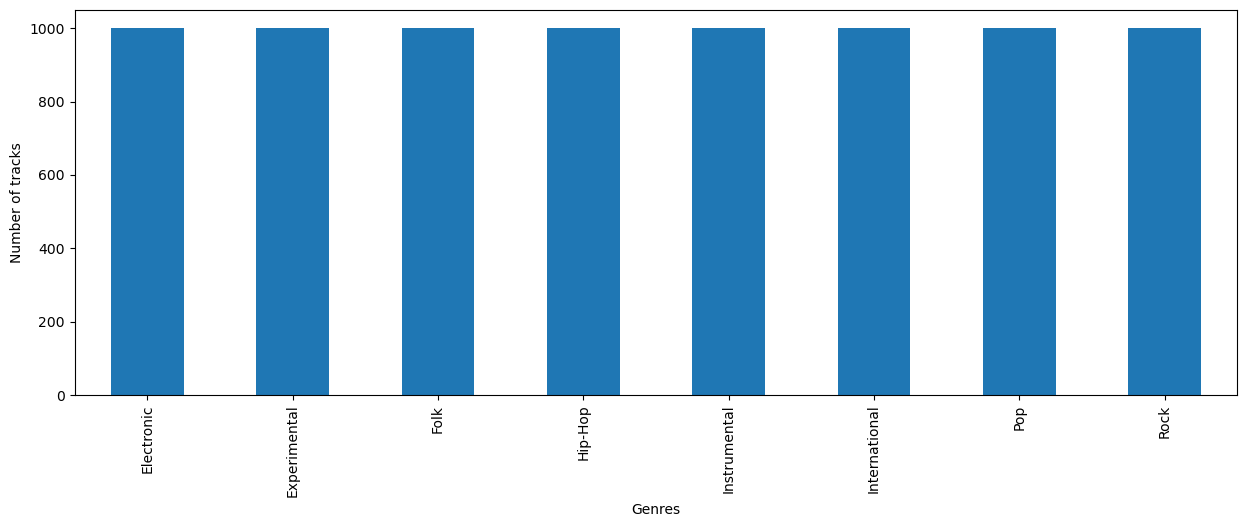

In [54]:
small['track', 'genre_top'].value_counts()[0:8].plot(kind='bar', figsize=(15, 5))
plt.xlabel('Genres')
plt.ylabel('Number of tracks')

Na histogramie widać równy rozkład między wszystkimi klasami.

In [12]:
# Add measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


def acc(y_test, y_pred):
    return accuracy_score(y_test, y_pred)


# Add Confusion Matrix
def conf_mat(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)


# Add F1 Score
def f1(y_test, y_pred):
    return classification_report(y_test, y_pred)


# PODZIAŁ NA ZBIÓR TESTOWY I TRENINGOWY

In [5]:
small = tracks['set', 'subset'] <= 'small'

train = tracks['set', 'split'] == 'training'
val = tracks['set', 'split'] == 'validation'
test = tracks['set', 'split'] == 'test'

Y_train = tracks.loc[small & train, ('track', 'genre_top')]
Y_test = tracks.loc[small & test, ('track', 'genre_top')]
X_train = features.loc[small & train, 'mfcc']
X_test = features.loc[small & test, 'mfcc']

print('{} training examples, {} testing examples'.format(Y_train.size, Y_test.size))
print('{} features, {} classes'.format(X_train.shape[1], np.unique(Y_train).size))

6400 training examples, 800 testing examples
140 features, 8 classes


In [ ]:
# set not empty categories
categories = np.unique(Y_train)
Y_train.cat.remove_unused_categories(inplace=True)
Y_test.cat.remove_unused_categories(inplace=True)

# GENEROWANIE I WCZYTYWANIE PLIKÓW ZE SPEKTROGRAMAMI

In [ ]:
# get all spectrograms file names
from pathlib import Path
spectrograms = [x.name for x in Path('data/spectrograms').glob('*.npy')]
spectrograms

In [ ]:
from glob import glob
import os
import librosa
import numpy as np

def get_spectrogram(y, sr):
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    log_S = librosa.power_to_db(S, ref=np.max)
    return log_S

# read data in memory efficient way using generator, process it to get spectrogram and save it to file
def spectrogram_generator():
    filenames = [y for x in os.walk('data_mp3') for y in glob(os.path.join(x[0], '*.mp3'))]
    for filename in filenames:
        if filename.endswith('.mp3'):
            name = os.path.splitext(os.path.basename(filename))[0]
            # get spectrogram only if it doesn't exist
            if name + '.npy' not in spectrograms:
                try:
                    data, sampling_rate = librosa.load(filename, duration=10)
                    log_S = get_spectrogram(data, sampling_rate)
                    # get filename without extension
                    yield name, log_S
                except:
                    print('Error reading file: ' + filename)


for name, log_S in spectrogram_generator():
    # save spectrogram only if it doesn't exist
    if name + '.npy' not in spectrograms:
        np.save('data/spectrograms/' + name + '.npy', log_S)

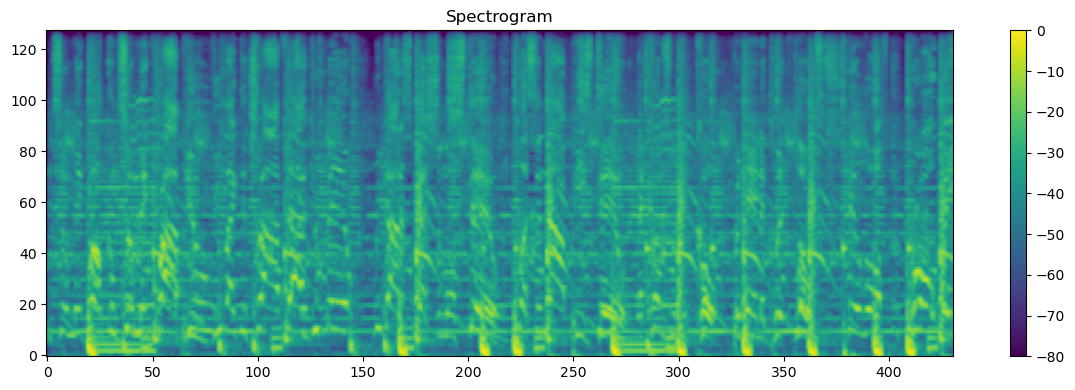

In [8]:
import matplotlib.pyplot as plt
# show first spectrogram
plt.figure(figsize=(12, 4))
plt.imshow(np.load('data/spectrograms/000002.npy'), aspect='auto', origin='lower')
plt.colorbar()
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

In [7]:
# Load spectrograms from files according to names from x_train and x_test
def load_spectrograms(x):
    spectrograms = []
    existing_spectrograms = []
    for name in x:
        try:
            spectrogram = np.load('data/spectrograms/' + name + '.npy')
            if spectrogram.shape == (128, 431):
                existing_spectrograms.append(int(name))
                spectrograms.append(spectrogram)
            else:
                raise Exception('Spectrogram shape is not correct')
        except:
            print('Error reading file: ' + name)
    return spectrograms, existing_spectrograms
    
x_train_names = ['{:06d}'.format(x) for x in X_train.index]
x_test_names = ['{:06d}'.format(x) for x in X_test.index]

x_train, x_train_names = load_spectrograms(x_train_names)
x_test, x_test_names = load_spectrograms(x_test_names)

Error reading file: 098565
Error reading file: 098567
Error reading file: 098569
Error reading file: 099134
Error reading file: 108925
Error reading file: 133297


# PRZYGOTOWANIE DANYCH DO TRENINGU NA SIECIACH KONWOLUCYJNYCH

In [8]:
# prepare data for training
X_train = np.stack(x_train)
X_test = np.stack(x_test)
y_train = Y_train.loc[Y_train.index.isin(x_train_names)]
y_test = Y_test.loc[Y_test.index.isin(x_test_names)]

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6394, 128, 431), (800, 128, 431), (6394,), (800,))

In [10]:
from keras.utils.np_utils import to_categorical

# input image dimensions
img_rows, img_cols = 128, 431

nb_classes = y_train.nunique()

y_train = to_categorical(y_train.cat.codes)
y_test = to_categorical(y_test.cat.codes)

x_train = np.array([x.reshape((img_rows, img_cols, 1)) for x in X_train])
x_test = np.array([x.reshape((img_rows, img_cols, 1)) for x in X_test])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= np.min(x_train)
x_test /= np.min(x_test)

# PROSTA SIEĆ KONWOLUCYJNA

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import tensorflow as tf

# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv), activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(nb_filters, (nb_conv, nb_conv), activation='relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

# load last saved model
model.load_weights(r"models\weights-improvement-500-0.63.hdf5")

# save model after each 100 epochs
BATCH_SIZE = 32
STEPS_PER_EPOCH = 200
SAVE_PERIOD = 100

filepath="models/weights-improvement-2-{epoch:02d}-{accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max', save_freq=STEPS_PER_EPOCH * SAVE_PERIOD)
callbacks_list = [checkpoint]
with tf.device('/gpu:0'):
    model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=500, verbose=1, validation_data=(x_test, y_test), callbacks=callbacks_list)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 429, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 427, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 213, 32)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 213, 32)       0         
                                                                 
 flatten (Flatten)           (None, 422592)            0         
                                                                 
 dense (Dense)               (None, 128)               54091904  
                                                        

In [10]:
y_test_series = Y_test.loc[Y_test.index.isin(x_test_names)]

## WYNIKI PROSTEJ SIECI KONWOLUCYJNEJ

Accuracy: 0.39
F1 score: 0.29


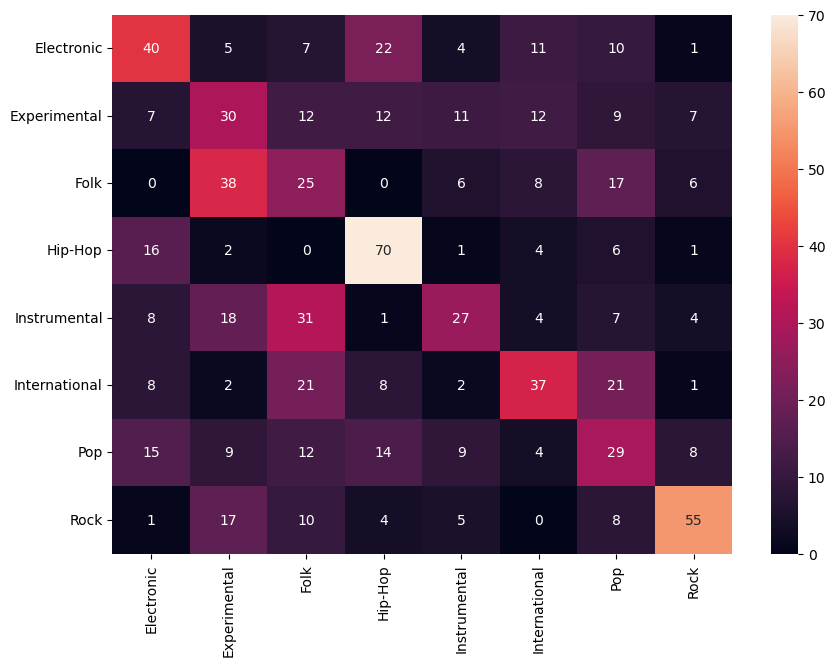

In [32]:
from keras.metrics import Precision, Recall, TruePositives, TrueNegatives, FalsePositives, FalseNegatives

y_pred = model.predict(x_test)

def get_metrics(model, x_test, y_test, y_pred):
    accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
    precision = Precision()(y_test, y_pred).numpy()
    recall = Recall()(y_test, y_pred).numpy()
    f1 = 2 * (precision * recall) / (precision + recall)
    return accuracy, f1

accuracy, f1 = get_metrics(model, x_test, y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 score: {f1:.2f}')

# plot confusion matrix
import seaborn as sns
import pandas as pd

def plot_confusion_matrix(model, x_test, y_test, y_pred, categories):
    y_pred = np.argmax(y_pred, axis=1)
    y_test = np.argmax(y_test, axis=1)
    cm = tf.math.confusion_matrix(y_test, y_pred).numpy()
    df_cm = pd.DataFrame(cm, index = [i for i in categories],
                      columns = [i for i in categories])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.show()

plot_confusion_matrix(model, x_test, y_test, y_pred, y_test_series.cat.categories.values)


Dla prostej sieci konwolucyjnej trenowanej przez 1000 epok otrzymany został wynik 39% skuteczności (F1-score 29%) co jest wynikiem przeciętnym jednak lepszym od klasyfikatora losowego, który otrzymałby skuteczność 12,5%. Na podstawie macierzy pomyłek można zauważyć, że model dość często mylił ze sobą niektóre gatunki muzyczne jak - muzykę Elektroniczną i Hip-Hop czy Folk i Instumentalną.

# SIEĆ KONWOLUCYJNA TYPU ALEXNET

In [11]:
# prepare data and bulid AlexNet model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras import optimizers
import tensorflow as tf


# input image dimensions
img_rows, img_cols = 128, 431
nb_classes = 8

# build AlexNet model
model = Sequential()
model.add(Conv2D(96, (11, 11), strides=(4, 4), input_shape=(img_rows, img_cols, 1), padding='same', activation='relu', kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
model.summary()

# save model after each 100 epochs
BATCH_SIZE = 32
STEPS_PER_EPOCH = 200
SAVE_PERIOD = 100

# load model weights
# model.load_weights("alexnet\weights-improvement-2-100-0.99.hdf5")

# filepath="alexnet/weights-improvement-2-{epoch:02d}-{accuracy:.2f}.hdf5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_freq="epoch")
# callbacks_list = [checkpoint]
# with tf.device('/gpu:0'):
#     model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=500, verbose=1, validation_data=(x_test, y_test), callbacks=callbacks_list)

# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 108, 96)       11712     
                                                                 
 batch_normalization (BatchN  (None, 32, 108, 96)      384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 53, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 53, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 15, 53, 256)      1024      
 hNormalization)                                                 
                                                        

d:\Programy\miniconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [12]:
# load model weights
model.load_weights("alexnet\weights-improvement-2-20-1.00.hdf5")
y_test_series = Y_test.loc[Y_test.index.isin(x_test_names)]

## WYNIKI TRENINGU SIECI TYPU ALEXNET

Accuracy: 0.49
F1 score: 0.49


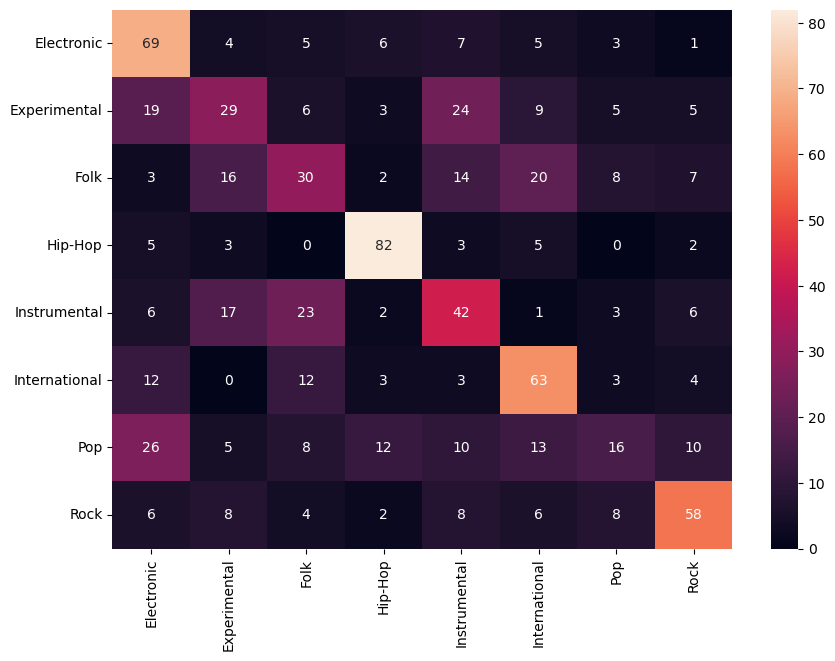

In [13]:
# import accuracy_score, f1_score, confusion_matrix from keras
from keras.metrics import Precision, Recall, TruePositives, TrueNegatives, FalsePositives, FalseNegatives

y_pred = model.predict(x_test)

def get_metrics(model, x_test, y_test, y_pred):
    accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
    precision = Precision()(y_test, y_pred).numpy()
    recall = Recall()(y_test, y_pred).numpy()
    f1 = 2 * (precision * recall) / (precision + recall)
    return accuracy, f1

accuracy, f1 = get_metrics(model, x_test, y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 score: {f1:.2f}')

# plot confusion matrix
import seaborn as sns
import pandas as pd

def plot_confusion_matrix(model, x_test, y_test, y_pred, categories):
    y_pred = np.argmax(y_pred, axis=1)
    y_test = np.argmax(y_test, axis=1)
    cm = tf.math.confusion_matrix(y_test, y_pred).numpy()
    df_cm = pd.DataFrame(cm, index = [i for i in categories],
                      columns = [i for i in categories])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.show()

plot_confusion_matrix(model, x_test, y_test, y_pred, y_test_series.cat.categories.values)

Dla sieci konwolucyjnej typu AlexNet, która była trenowana przez około 200 epok otrzymany został wynik 49% skuteczności (F1-score 49%) co jest lepszym wynikiem od prostej sieci konwolucyjnej i jest wynikiem średnim. Na macierzy pomyłek można zauważyć, że ten model często mylił ze sobą muzykę Pop i Elektroniczną, Eksperymentalną i Instrumentalną czy Folk i Instrumentalną. Można zatem zawuażyć pewne podobieństwa w pomyłkach z poprzednią siecią co może sugerować, że spektrogramy tych gatunków są dość podobne ze sobą.